In [94]:
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 파일 읽기 및 병합

In [ ]:
import pyspark
from pyspark.sql import SparkSession

스파크 = SparkSession.builder.appName('FinalDB').getOrCreate()

스파크.conf.set("spark.sql.execution.arrow.enabled","true")

In [3]:
import pandas as pd

In [ ]:
help(스파크.read)

Help on DataFrameReader in module pyspark.sql.readwriter object:

class DataFrameReader(OptionUtils)
 |  DataFrameReader(spark)
 |  
 |  Interface used to load a :class:`DataFrame` from external storage systems
 |  (e.g. file systems, key-value stores, etc). Use :attr:`SparkSession.read`
 |  to access this.
 |  
 |  .. versionadded:: 1.4
 |  
 |  Method resolution order:
 |      DataFrameReader
 |      OptionUtils
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, spark)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  csv(self, path, schema=None, sep=None, encoding=None, quote=None, escape=None, comment=None, header=None, inferSchema=None, ignoreLeadingWhiteSpace=None, ignoreTrailingWhiteSpace=None, nullValue=None, nanValue=None, positiveInf=None, negativeInf=None, dateFormat=None, timestampFormat=None, maxColumns=None, maxCharsPerColumn=None, maxMalformedLogPerPartition=None, mode=None, columnNameOfCorruptRecord=None, multiLi

In [ ]:
partial1 = 스파크.read.parquet("hdfs://localhost:9000/finalDB/Partial1.parquet",header=False)
partial2 = 스파크.read.parquet("hdfs://localhost:9000/finalDB/Partial2.parquet",header=False, inferSchema='true')
partial3 = 스파크.read.csv("hdfs://localhost:9000/finalDB/Partial3.csv",header=True, inferSchema='true',nanValue='NA')
partial4 = 스파크.read.parquet("hdfs://localhost:9000/finalDB/Partial4.parquet",header=False, inferSchema='true')
partial5 = 스파크.read.csv("hdfs://localhost:9000/finalDB/Partial5.csv",header=True, inferSchema='true',nanValue='NA')
testX = 스파크.read.csv("hdfs://localhost:9000/finalDB/TestX.csv",header=True, inferSchema='true')
testY = 스파크.read.csv("hdfs://localhost:9000/finalDB/TestY.csv",header=True, inferSchema='true')

In [ ]:
partial1.show()

+--------+---+-------+-------+-------+------+----------------+
|      ID| X1|     X2|     X3|     X4|    X5|               Y|
+--------+---+-------+-------+-------+------+----------------+
|P1000002| A3| 0.1972|  6.563| 8.4542|Group3|27612.3830690663|
|P1000007| A1|-0.9084| 10.491| 9.8017|Group2|9150.26570738822|
|P1000030| A3| 0.3164| 11.341|14.8871|Group2|76579.6846859015|
|P1000046| A2| 0.7928| 11.831| 8.7676|Group2| 51189.603726392|
|P1000060| A1| 0.4274| 17.689|10.6112|Group2|148313.339805297|
|P1000064| A1|-1.5066| 19.845| 9.7027|Group2| 61074.026560969|
|P1000083| A1| 1.1936|  3.574| 7.8773|Group1| 50632.088794274|
|P1000084| A2|-1.1741|   4.27|10.4408|Group2|3065.22776267054|
|P1000087| A1|-0.3164|  3.105|13.7127|Group1|6159.11438564402|
|P1000129| A2|-0.4274| -0.509|   null|Group2|159393.020826127|
|P1000134| A3|-0.3956| 17.278| 9.9707|Group2|17878.3668202395|
|P1000135| A2| 1.7911|-10.606| 7.4471|Group2|126520.220925557|
|P1000144| A2|-1.0985| 16.782|10.6775|Group2|2877.21069

In [ ]:
partial2.show()

+--------+---+-------+------+-------+------+----------------+
|      ID| X1|     X2|    X3|     X4|    X5|               Y|
+--------+---+-------+------+-------+------+----------------+
|P2719506| A2| 0.5635| 19.53|10.7549|Group2|9472.15793711915|
|P2719527| A3| 0.6974| 5.715| 9.4916|Group2|44303.9092649457|
|P2719528| A4|-0.4836| 4.853|  9.343|Group2|52246.9977763756|
|P2719535| A4|-0.5615|20.953| 7.1045|Group1|56845.0541589212|
|P2719540| A3|-1.4082| 9.077| 8.7619|Group1|7196.05546706117|
|P2719544| A3| 1.3919|18.076| 9.2163|Group3|60284.5425136252|
|P2719568| A4| 1.3628|16.896| 8.4481|Group3|87868.9754856233|
|P2719573| A3|-0.4226| 6.282| 8.4585|Group2|2764.75772700315|
|P2719578| A3|-1.8137|25.886|12.7381|Group2|43816.3282019522|
|P2719587| A2|-0.1503| 5.928| 10.047|Group2|4850.47692206552|
|P2719591| A1|-0.8007|12.529|11.2761|Group3|23402.6673160544|
|P2719593| A3|-1.0958|-3.465|14.4829|Group3|33630.6491501798|
|P2719598| A2|-0.6077|10.432| 9.3188|Group2|69004.1641604068|
|P271960

In [ ]:
partial3.show()

+--------+---+-------+------+-------+------+----------------+
|      ID| X1|     X2|    X3|     X4|    X5|               Y|
+--------+---+-------+------+-------+------+----------------+
|P5296770| A1|-0.1934|26.697|    NaN|Group2|83223.5089882021|
|P5296771| A2|  0.068|10.071| 6.1157|Group1|43143.3482288991|
|P5296777| A2|-1.7123| 3.661|  9.493|Group2|1550.53998250517|
|P5296784| A4| 0.1998| 19.85| 9.3692|Group2|7572.07919410697|
|P5296787| A2|-1.4737|18.933|12.1682|Group2|5895.67818712711|
|P5296792| A3|-0.7172|23.318| 5.7581|Group2|591.379519815538|
|P5296797| A3| 0.9106| 9.803| 9.5171|Group1| 84390.077175249|
|P5296801| A4|-0.6138| 9.279|  6.969|Group3| 22383.329163738|
|P5296804| A4| 0.9997|13.654|  7.841|Group2|387864.997228424|
|P5296806| A2| 0.1604| 0.877|10.7047|Group2|314654.491913031|
|P5296812| A2| 0.0066| 3.463| 7.3294|Group1|42859.7258388003|
|P5296818| A3| 1.4919| 7.673|11.3736|Group1|263935.836661629|
|P5296843| A3| -1.186| 3.179| 8.6388|Group3| 6773.9303200115|
|P529685

In [ ]:
partial4.show()

+--------+----+----+--------+---+------+
|      ID|  X6|  X7|      X8| X9|   X10|
+--------+----+----+--------+---+------+
|P1000002| 5.0|Age4|10.60235| 82|  Male|
|P1000007| 4.0|Age4|10.61032|113|  Male|
|P1000030| 5.0|Age3|  9.6749|144|  Male|
|P1000046| 6.0|Age2| 9.97378| 97|  Male|
|P1000060| 6.0|Age4| 9.90083|115|Female|
|P1000064| 7.0|Age5| 9.47728|106|Female|
|P1000083| 4.0|Age2|10.02851|132|  null|
|P1000084| 3.0|Age3|10.09016| 69|Female|
|P1000087| 5.0|Age2| 9.64176| 81|  Male|
|P1000129| 5.0|Age6| 9.74908|124|  Male|
|P1000134|null|Age3| 9.90555| 87|Female|
|P1000135| 5.0|Age3| 9.96361|100|  Male|
|P1000144| 4.0|Age1| 9.36281|111|Female|
|P1000155|null|Age5|11.03876| 94|  Male|
|P1000159| 5.0|Age5|10.26507| 86|  null|
|P1000161| 7.0|Age5| 9.03383|143|  Male|
|P1000168| 4.0|Age4|  9.9605|110|  Male|
|P1000184|null|Age2|10.39374| 88|Female|
|P1000196| 5.0|Age3|10.40964| 76|Female|
|P1000201| 3.0|Age3| 11.2311|130|  Male|
+--------+----+----+--------+---+------+
only showing top

In [ ]:
partial5.show()

+--------+---+-------+------+-------+------+---+----+--------+---+------+----------------+
|      ID| X1|     X2|    X3|     X4|    X5| X6|  X7|      X8| X9|   X10|               Y|
+--------+---+-------+------+-------+------+---+----+--------+---+------+----------------+
|P7012624| A1|-0.1718|-6.029|10.0731|Group2|5.0|Age2|11.18789|110|Female| 1809.4066683521|
|P7012632| A1| 0.6555|19.096|14.8677|Group2|NaN|Age2|11.65603| 75|  Male|6169.86544506177|
|P7012650| A2| 1.5115| 22.17| 9.8844|Group2|5.0|Age2| 7.05619|107|  Male|1308083.55599052|
|P7012666| A2| 0.5592|18.946| 9.9524|Group2|3.0|Age5|10.18829|120|  Male|335458.799456466|
|P7012667| A2|-1.2013|  0.79| 9.1048|Group2|7.0|Age1|10.16804| 83|  Male|774.036249751602|
|P7012674| A1|-0.2493| 3.153| 9.7621|Group2|4.0|Age5| 8.81591| 98|Female|156425.091386052|
|P7012677| A2|-0.4913|-0.263| 7.6003|Group2|6.0|Age2| 9.57989| 92|  Male| 8592.8939887216|
|P7012680| A4| 1.0269| 1.933| 9.0063|Group2|5.0|Age4| 9.29235| 86|  Male|318925.796855421|

In [ ]:
print(len(partial5.columns))

12


In [ ]:
train = partial1.unionByName(partial2, allowMissingColumns=True)
train = train.unionByName(partial3, allowMissingColumns=True)
train.show()

+--------+---+-------+-------+-------+------+----------------+
|      ID| X1|     X2|     X3|     X4|    X5|               Y|
+--------+---+-------+-------+-------+------+----------------+
|P1000002| A3| 0.1972|  6.563| 8.4542|Group3|27612.3830690663|
|P1000007| A1|-0.9084| 10.491| 9.8017|Group2|9150.26570738822|
|P1000030| A3| 0.3164| 11.341|14.8871|Group2|76579.6846859015|
|P1000046| A2| 0.7928| 11.831| 8.7676|Group2| 51189.603726392|
|P1000060| A1| 0.4274| 17.689|10.6112|Group2|148313.339805297|
|P1000064| A1|-1.5066| 19.845| 9.7027|Group2| 61074.026560969|
|P1000083| A1| 1.1936|  3.574| 7.8773|Group1| 50632.088794274|
|P1000084| A2|-1.1741|   4.27|10.4408|Group2|3065.22776267054|
|P1000087| A1|-0.3164|  3.105|13.7127|Group1|6159.11438564402|
|P1000129| A2|-0.4274| -0.509|   null|Group2|159393.020826127|
|P1000134| A3|-0.3956| 17.278| 9.9707|Group2|17878.3668202395|
|P1000135| A2| 1.7911|-10.606| 7.4471|Group2|126520.220925557|
|P1000144| A2|-1.0985| 16.782|10.6775|Group2|2877.21069

In [ ]:
train.count()

800000

In [ ]:
train = train.join(partial4,train.ID==partial4.ID,'inner')
train.show()

+--------+---+-------+------+-------+------+----------------+--------+----+----+--------+---+------+
|      ID| X1|     X2|    X3|     X4|    X5|               Y|      ID|  X6|  X7|      X8| X9|   X10|
+--------+---+-------+------+-------+------+----------------+--------+----+----+--------+---+------+
|P1000225| A2|-0.4578|-0.326|10.1997|Group1|25117.4149775698|P1000225| 7.0|Age4| 9.89995| 75|  Male|
|P1000235| A2|-0.4115|-5.716| 9.2232|Group2|43666.8277002937|P1000235| 5.0|Age4| 9.07033|128|  null|
|P1000342| A4|-0.4945|24.935|10.6905|Group2|8680.83289773887|P1000342| 5.0|Age4|  12.075|102|  Male|
|P1000446| A1| 0.1025|25.697|10.9521|Group2|77340.5181435829|P1000446| 6.0|Age3| 9.77786|113|Female|
|P1000456| A4| 0.3463|  4.73| 9.7241|Group2|55934.6056416545|P1000456| 4.0|Age4| 9.87229| 97|  Male|
|P1000718| A2| 1.5204|26.643|11.7445|Group2| 1436530.3715318|P1000718|null|Age5| 9.89221|111|Female|
|P1000791| A2|-0.1539|11.502|13.3856|Group2|37512.6610417111|P1000791| 5.0|Age5|11.07717| 6

In [ ]:
train= train.drop(partial4.ID)

In [ ]:
train = train.toPandas()

In [ ]:
partial5 = partial5.toPandas()

In [ ]:
train =pd.concat([train, partial5]).drop_duplicates('ID')

In [ ]:
train

,ID,X1,X2,X3,X4,X5,Y,X6,X7,X8,X9,X10
0,P1000225,A2,-0.4578,-0.326,10.1997,Group1,25117.414978,7.0,Age4,9.89995,75,Male
1,P1000235,A2,-0.4115,-5.716,9.2232,Group2,43666.827700,5.0,Age4,9.07033,128,None
2,P1000342,A4,-0.4945,24.935,10.6905,Group2,8680.832898,5.0,Age4,12.07500,102,Male
3,P1000446,A1,0.1025,25.697,10.9521,Group2,77340.518144,6.0,Age3,9.77786,113,Female
4,P1000456,A4,0.3463,4.730,9.7241,Group2,55934.605642,4.0,Age4,9.87229,97,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
299995,P9587387,A3,0.2013,15.626,8.3525,Group2,7069.064243,7.0,Age2,10.36164,81,Female
299996,P9587397,A3,-0.6400,3.886,9.9738,Group2,160429.364370,3.0,Age6,9.14072,76,Male
299997,P9587401,A4,-1.5581,4.973,11.9101,Group3,13160.601303,4.0,Age3,8.82045,119,Female
299998,P9587403,A4,-0.6357,-6.400,12.2552,Group2,4911.621620,5.0,Age3,10.19433,102,Male


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 299999
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   ID      1000000 non-null  object 
 1   X1      995186 non-null   object 
 2   X2      1000000 non-null  float64
 3   X3      1000000 non-null  float64
 4   X4      963132 non-null   float64
 5   X5      999062 non-null   object 
 6   Y       1000000 non-null  float64
 7   X6      923006 non-null   float64
 8   X7      1000000 non-null  object 
 9   X8      1000000 non-null  float64
 10  X9      1000000 non-null  int32  
 11  X10     978024 non-null   object 
dtypes: float64(6), int32(1), object(5)
memory usage: 95.4+ MB


In [ ]:
train.to_parquet('train.parquet')

In [ ]:
train.to_csv('train2.csv')

In [ ]:
testX = testX.toPandas()
testY = testY.toPandas()

In [ ]:
testX.to_parquet('testX.parquet')
testY.to_parquet('testY.parquet')

In [ ]:
testX

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,P9587410,A4,1.4451,21.091,9.8848,Group1,5,Age5,10.09841,92,Male
1,P9587424,A1,-0.0209,13.235,7.8846,Group2,5,Age3,10.37013,99,Female
2,P9587426,A3,0.7792,17.257,10.6058,Group2,5,Age6,9.56067,95,Male
3,P9587439,A2,-0.1679,31.393,12.692,Group2,5,Age4,10.63859,98,Female
4,P9587448,A1,0.8661,7.413,NA,Group3,6,Age2,7.36374,87,Male
...,...,...,...,...,...,...,...,...,...,...,...
48595,P9999956,A1,-0.9022,25.929,11.0598,Group1,6,Age4,10.35923,112,Female
48596,P9999973,A3,0.9984,18.744,8.054,Group1,6,Age5,9.96515,102,Female
48597,P9999977,A1,1.0163,4.117,10.5752,Group2,7,Age3,9.72330,109,Male
48598,P9999979,A2,-1.3081,3.577,12.1787,Group1,6,Age2,10.17985,49,Male


In [ ]:
testY

,ID,Y
0,P9920380,1.344195e+04
1,P9619726,3.746506e+04
2,P9851405,3.457257e+05
3,P9764914,2.366305e+04
4,P9615948,1.608376e+06
...,...,...
48595,P9599067,8.877280e+05
48596,P9851235,9.297566e+03
48597,P9658431,3.148576e+04
48598,P9661211,2.172044e+04


In [4]:
import pandas as pd

In [5]:
# connect google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train=pd.read_parquet('C:\\Class\\train.parquet')
train

,ID,X1,X2,X3,X4,X5,Y,X6,X7,X8,X9,X10
0,P1000225,A2,-0.4578,-0.326,10.1997,Group1,25117.414978,7.0,Age4,9.89995,75,Male
1,P1000235,A2,-0.4115,-5.716,9.2232,Group2,43666.827700,5.0,Age4,9.07033,128,None
2,P1000342,A4,-0.4945,24.935,10.6905,Group2,8680.832898,5.0,Age4,12.07500,102,Male
3,P1000446,A1,0.1025,25.697,10.9521,Group2,77340.518144,6.0,Age3,9.77786,113,Female
4,P1000456,A4,0.3463,4.730,9.7241,Group2,55934.605642,4.0,Age4,9.87229,97,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
299995,P9587387,A3,0.2013,15.626,8.3525,Group2,7069.064243,7.0,Age2,10.36164,81,Female
299996,P9587397,A3,-0.6400,3.886,9.9738,Group2,160429.364370,3.0,Age6,9.14072,76,Male
299997,P9587401,A4,-1.5581,4.973,11.9101,Group3,13160.601303,4.0,Age3,8.82045,119,Female
299998,P9587403,A4,-0.6357,-6.400,12.2552,Group2,4911.621620,5.0,Age3,10.19433,102,Male


In [ ]:
#!pip install pyarrow
#!pip install fastparquet

In [ ]:
train = pd.read_parquet("C:\\Class\\train.parquet")
train

,ID,X1,X2,X3,X4,X5,Y,X6,X7,X8,X9,X10
0,P1000225,A2,-0.4578,-0.326,10.1997,Group1,25117.414978,7.0,Age4,9.89995,75,Male
1,P1000235,A2,-0.4115,-5.716,9.2232,Group2,43666.827700,5.0,Age4,9.07033,128,None
2,P1000342,A4,-0.4945,24.935,10.6905,Group2,8680.832898,5.0,Age4,12.07500,102,Male
3,P1000446,A1,0.1025,25.697,10.9521,Group2,77340.518144,6.0,Age3,9.77786,113,Female
4,P1000456,A4,0.3463,4.730,9.7241,Group2,55934.605642,4.0,Age4,9.87229,97,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
299995,P9587387,A3,0.2013,15.626,8.3525,Group2,7069.064243,7.0,Age2,10.36164,81,Female
299996,P9587397,A3,-0.6400,3.886,9.9738,Group2,160429.364370,3.0,Age6,9.14072,76,Male
299997,P9587401,A4,-1.5581,4.973,11.9101,Group3,13160.601303,4.0,Age3,8.82045,119,Female
299998,P9587403,A4,-0.6357,-6.400,12.2552,Group2,4911.621620,5.0,Age3,10.19433,102,Male


In [64]:
testX = pd.read_parquet("/content/gdrive/MyDrive/testX.parquet")
testY = pd.read_parquet("/content/gdrive/MyDrive/testY.parquet")

In [ ]:
testY

,ID,Y
0,P9920380,1.344195e+04
1,P9619726,3.746506e+04
2,P9851405,3.457257e+05
3,P9764914,2.366305e+04
4,P9615948,1.608376e+06
...,...,...
48595,P9599067,8.877280e+05
48596,P9851235,9.297566e+03
48597,P9658431,3.148576e+04
48598,P9661211,2.172044e+04


In [ ]:
train.to_csv('C:\\Class\\train.csv')

In [6]:
train = pd.read_csv('/content/gdrive/MyDrive/train.csv',na_values='none')

# EDA

## 데이터 확인

In [7]:
train.isna().sum()

Unnamed: 0        0
ID                0
X1             9620
X2                0
X3                0
X4            36868
X5             1899
Y                 0
X6            76994
X7                0
X8                0
X9                0
X10           27427
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1000000 non-null  int64  
 1   ID          1000000 non-null  object 
 2   X1          990380 non-null   object 
 3   X2          1000000 non-null  float64
 4   X3          1000000 non-null  float64
 5   X4          963132 non-null   float64
 6   X5          998101 non-null   object 
 7   Y           1000000 non-null  float64
 8   X6          923006 non-null   float64
 9   X7          1000000 non-null  object 
 10  X8          1000000 non-null  float64
 11  X9          1000000 non-null  int64  
 12  X10         972573 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 99.2+ MB


In [9]:
train = train[['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'Y']]

In [10]:
train.head(30)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,P1000225,A2,-0.4578,-0.326,10.1997,Group1,7.0,Age4,9.89995,75,Male,2.511741e+04
1,P1000235,A2,-0.4115,-5.716,9.2232,Group2,5.0,Age4,9.07033,128,NaN,4.366683e+04
2,P1000342,A4,-0.4945,24.935,10.6905,Group2,5.0,Age4,12.07500,102,Male,8.680833e+03
3,P1000446,A1,0.1025,25.697,10.9521,Group2,6.0,Age3,9.77786,113,Female,7.734052e+04
4,P1000456,A4,0.3463,4.730,9.7241,Group2,4.0,Age4,9.87229,97,Male,5.593461e+04
5,P1000718,A2,1.5204,26.643,11.7445,Group2,NaN,Age5,9.89221,111,Female,1.436530e+06
6,P1000791,A2,-0.1539,11.502,13.3856,Group2,5.0,Age5,11.07717,66,Female,3.751266e+04
7,P1000864,A4,1.7582,8.017,9.9748,Group2,NaN,Age5,9.96618,88,Female,8.150786e+05
8,P1000935,A1,-0.4187,0.843,10.0132,Group2,5.0,Age4,9.71739,98,Female,2.823237e+04
9,P1001203,A4,0.4659,12.703,12.2523,Group1,5.0,Age2,9.69451,106,Male,3.212798e+04


### 메모리 사용 용량 줄이기

In [11]:
train['X1']=train['X1'].astype('category')
train['X5']=train['X5'].astype('category')
train['X7']=train['X7'].astype('category')
train['X10']=train['X10'].astype('category')

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype   
---  ------  --------------    -----   
 0   ID      1000000 non-null  object  
 1   X1      990380 non-null   category
 2   X2      1000000 non-null  float64 
 3   X3      1000000 non-null  float64 
 4   X4      963132 non-null   float64 
 5   X5      998101 non-null   category
 6   X6      923006 non-null   float64 
 7   X7      1000000 non-null  category
 8   X8      1000000 non-null  float64 
 9   X9      1000000 non-null  int64   
 10  X10     972573 non-null   category
 11  Y       1000000 non-null  float64 
dtypes: category(4), float64(6), int64(1), object(1)
memory usage: 64.9+ MB


## 결측치 제거


### 범주형 변수
최빈값으로 대체

In [ ]:
#train = train.dropna(subset=['X1','X5','X7','X10'])

In [13]:
최빈값 = train.mode()
최빈값

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,P1000002,A1,-0.0332,10.294,9.6776,Group2,5.0,Age5,10.00676,99.0,Male,2.718282e+00
1,P1000007,NaN,0.0650,NaN,11.2662,NaN,NaN,NaN,NaN,NaN,NaN,3.099131e+00
2,P1000030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.296271e+00
3,P1000046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.795283e+00
4,P1000060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.065999e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,P9587387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.662694e+08
999996,P9587397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.818463e+08
999997,P9587401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.961152e+08
999998,P9587403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.148347e+08


In [14]:
train[['X1','X5','X7','X10']] = train[['X1','X5','X7','X10']].fillna(최빈값.iloc[0,:])

In [15]:
train.isna().sum()

ID         0
X1         0
X2         0
X3         0
X4     36868
X5         0
X6     76994
X7         0
X8         0
X9         0
X10        0
Y          0
dtype: int64

 ### 수치형 변수
 범주형 변수를 기준으로 분류하여 평균으로 대체

In [16]:
train['X4'] = train.groupby(['X1','X5','X7','X10'],group_keys=False)['X4'].apply(lambda x: x.fillna(x.mean()))

In [17]:
train['X6'] = train.groupby(['X1','X5','X7','X10'],group_keys=False)['X6'].apply(lambda x: x.fillna(x.mean()))

In [18]:
train.isna().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
Y      0
dtype: int64

In [ ]:
#train.drop('Unnamed: 0', axis =1)

,ID,X1,X2,X3,X4,X5,Y,X6,X7,X8,X9,X10
0,P1000225,A2,-0.4578,-0.326,10.1997,Group1,25117.414978,7.0,Age4,9.89995,75,Male
1,P1000235,A2,-0.4115,-5.716,9.2232,Group2,43666.827700,5.0,Age4,9.07033,128,Male
2,P1000342,A4,-0.4945,24.935,10.6905,Group2,8680.832898,5.0,Age4,12.07500,102,Male
3,P1000446,A1,0.1025,25.697,10.9521,Group2,77340.518144,6.0,Age3,9.77786,113,Female
4,P1000456,A4,0.3463,4.730,9.7241,Group2,55934.605642,4.0,Age4,9.87229,97,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,P9587387,A3,0.2013,15.626,8.3525,Group2,7069.064243,7.0,Age2,10.36164,81,Female
999996,P9587397,A3,-0.6400,3.886,9.9738,Group2,160429.364370,3.0,Age6,9.14072,76,Male
999997,P9587401,A4,-1.5581,4.973,11.9101,Group3,13160.601303,4.0,Age3,8.82045,119,Female
999998,P9587403,A4,-0.6357,-6.400,12.2552,Group2,4911.621620,5.0,Age3,10.19433,102,Male


In [19]:
train_numeric = train._get_numeric_data()

In [20]:
train_numeric.isna().sum()

X2    0
X3    0
X4    0
X6    0
X8    0
X9    0
Y     0
dtype: int64

In [21]:
print(train_numeric.skew()) # 왜도 작아서 설명변수 로그변환 필요 없음, 반응변수(Y)만 변수 변환 해주기

X2      0.000529
X3     -0.000164
X4     -0.002495
X6      0.001329
X8      0.001181
X9     -0.001914
Y     182.921642
dtype: float64


In [22]:
numeric_feature = ['X2','X3','X4','X6','X8','X9']
categorical_feature = ['X1','X5','X7','X10']

## 이상치 확인

In [23]:
#!pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

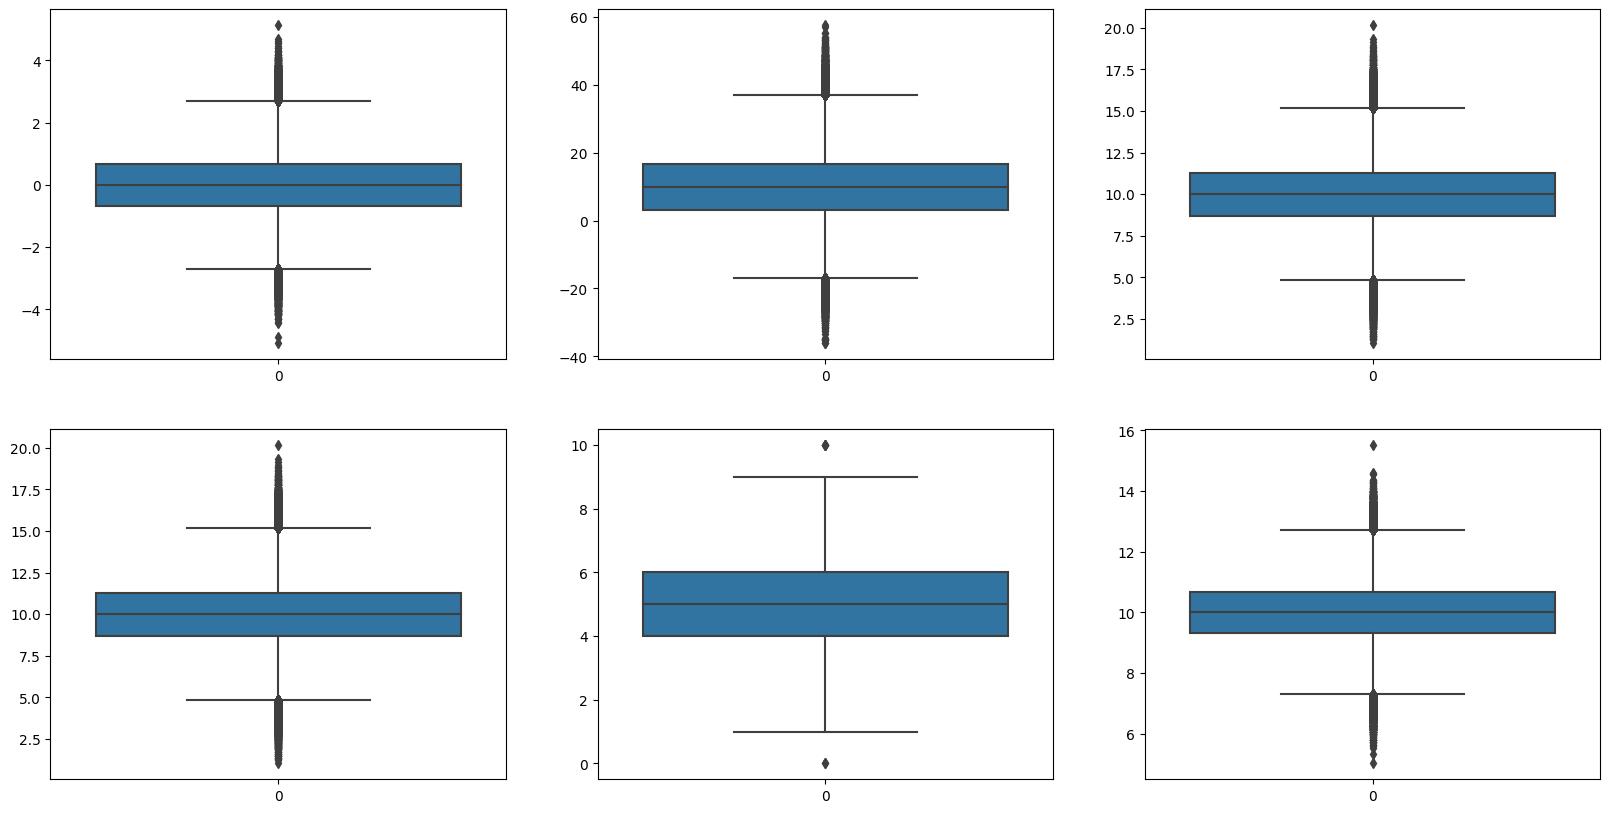

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for row in range(2):
    for col in range(3):
        idx = row * 2 + col
        ax = axes[row][col]
        if idx < len(numeric_feature):
            value = numeric_feature[idx]
            sns.boxplot(train[value],ax=ax)

plt.show()

이상치가 많이 존재함 -> 그러나 유의미한 이상치일 수 있기 때문에 제거하지 않음

## 데이터 분포 확인

### 독립변수

#### 범주형 변수

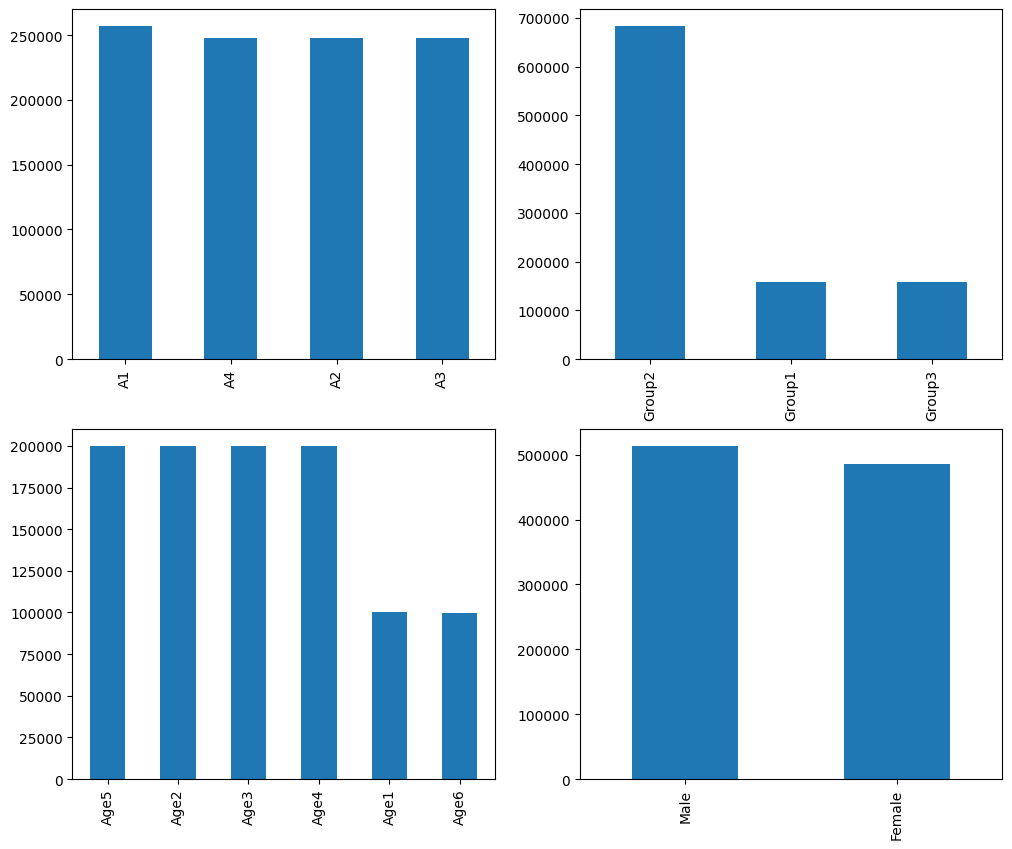

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for row in range(2):
    for col in range(2):
        idx = row * 2 + col

        if idx < len(categorical_feature):
            ax = axes[row][col]
            value = categorical_feature[idx]
            train[value].value_counts().plot(kind='bar',ax=ax)

plt.show()

#### 수치형 변수

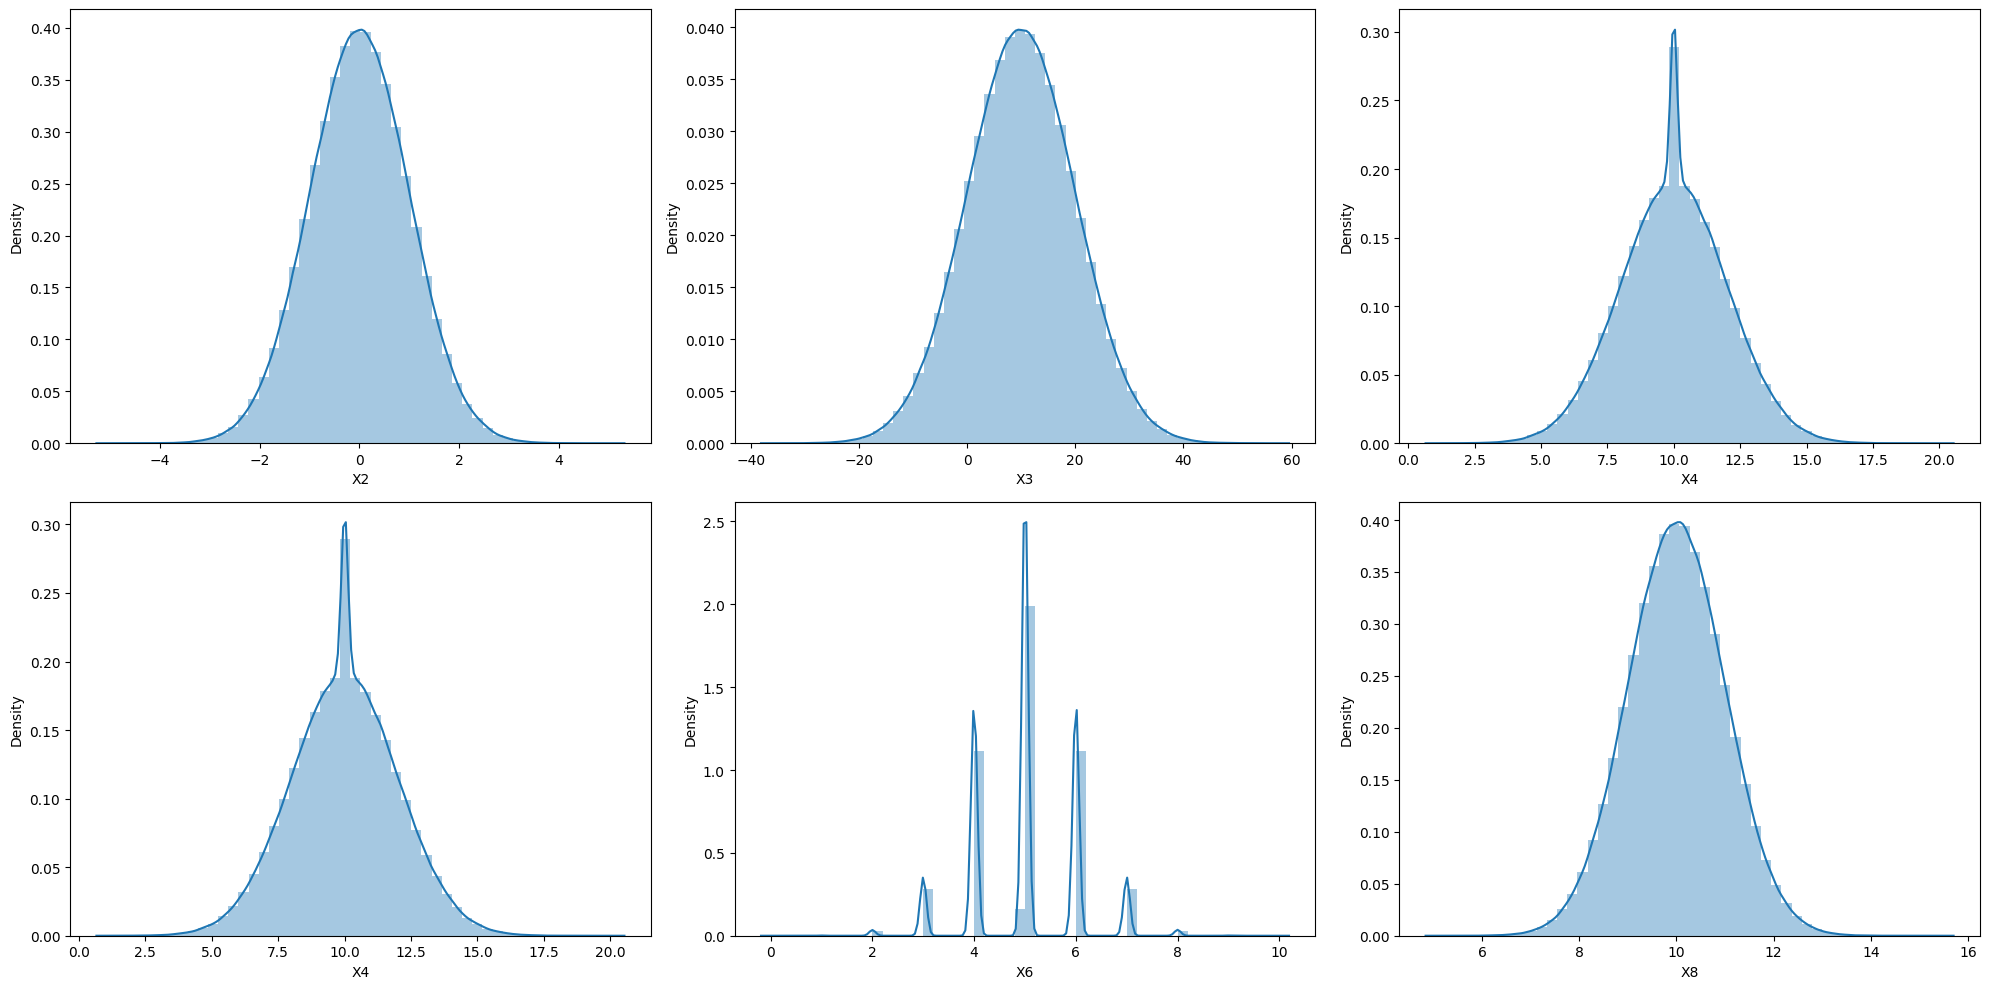

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for row in range(2):
    for col in range(3):
        idx = row * 2 + col
        ax = axes[row][col]
        if idx < len(numeric_feature):
            value = numeric_feature[idx]
            sns.distplot(train[value],ax=ax)

plt.show()

데이터의 양이 매우 많이 때문에 대부분 정규분포의 모형을 따름
변수 'X3'의 범위가 (-40,60)까지 매우 넓음 -> Scaling 필요할 것으로 보임

### 반응변수

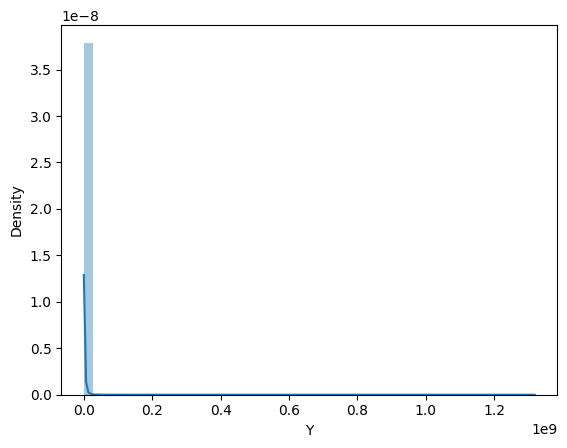

In [27]:
sns.distplot(train['Y'])
plt.show()

반응변수의 분포가 왼쪽으로 많이 치우쳐짐 -> Y 에 대하여 로그변환 필요

## 변수 간 상관관계 확인

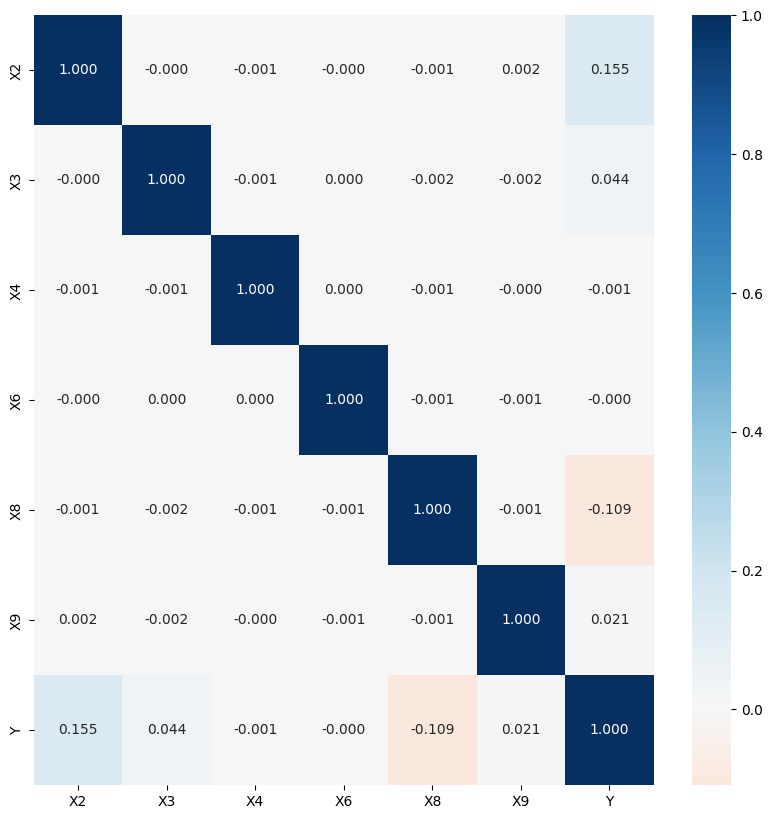

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_var = list(train.columns)

corr = train[corr_var].corr()

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr, annot=True, fmt=".3f", cmap="RdBu", center=0, ax=ax)

plt.show()

변수 간 상관관계 거의 없음 , 독립적임

# 데이터 전처리

## train 데이터셋 전처리

### 변수 변환

#### 반응 변수 로그 변환
왜도값이 매우 컸고, 분포를 시각화하였을때도 왼쪽으로 많이 치우침

In [23]:
import numpy as np
train['log_Y'] = np.log(train['Y'])

In [24]:
train

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y,log_Y
0,P1000225,A2,-0.4578,-0.326,10.1997,Group1,7.0,Age4,9.89995,75,Male,25117.414978,10.131317
1,P1000235,A2,-0.4115,-5.716,9.2232,Group2,5.0,Age4,9.07033,128,Male,43666.827700,10.684344
2,P1000342,A4,-0.4945,24.935,10.6905,Group2,5.0,Age4,12.07500,102,Male,8680.832898,9.068873
3,P1000446,A1,0.1025,25.697,10.9521,Group2,6.0,Age3,9.77786,113,Female,77340.518144,11.255973
4,P1000456,A4,0.3463,4.730,9.7241,Group2,4.0,Age4,9.87229,97,Male,55934.605642,10.931939
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,P9587387,A3,0.2013,15.626,8.3525,Group2,7.0,Age2,10.36164,81,Female,7069.064243,8.863483
999996,P9587397,A3,-0.6400,3.886,9.9738,Group2,3.0,Age6,9.14072,76,Male,160429.364370,11.985609
999997,P9587401,A4,-1.5581,4.973,11.9101,Group3,4.0,Age3,8.82045,119,Female,13160.601303,9.484983
999998,P9587403,A4,-0.6357,-6.400,12.2552,Group2,5.0,Age3,10.19433,102,Male,4911.621620,8.499359


#### 범주형 변수의 더미변수화
get_dummies 함수 사용

In [25]:
train_dummy = pd.get_dummies(train, columns = ['X1','X5','X7','X10'])

In [26]:
train_dummy = train_dummy.drop('ID',axis=1)

In [27]:
train_dummy

,X2,X3,X4,X6,X8,X9,Y,log_Y,X1_A1,X1_A2,...,X5_Group2,X5_Group3,X7_Age1,X7_Age2,X7_Age3,X7_Age4,X7_Age5,X7_Age6,X10_Female,X10_Male
0,-0.4578,-0.326,10.1997,7.0,9.89995,75,25117.414978,10.131317,0,1,...,0,0,0,0,0,1,0,0,0,1
1,-0.4115,-5.716,9.2232,5.0,9.07033,128,43666.827700,10.684344,0,1,...,1,0,0,0,0,1,0,0,0,1
2,-0.4945,24.935,10.6905,5.0,12.07500,102,8680.832898,9.068873,0,0,...,1,0,0,0,0,1,0,0,0,1
3,0.1025,25.697,10.9521,6.0,9.77786,113,77340.518144,11.255973,1,0,...,1,0,0,0,1,0,0,0,1,0
4,0.3463,4.730,9.7241,4.0,9.87229,97,55934.605642,10.931939,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.2013,15.626,8.3525,7.0,10.36164,81,7069.064243,8.863483,0,0,...,1,0,0,1,0,0,0,0,1,0
999996,-0.6400,3.886,9.9738,3.0,9.14072,76,160429.364370,11.985609,0,0,...,1,0,0,0,0,0,0,1,0,1
999997,-1.5581,4.973,11.9101,4.0,8.82045,119,13160.601303,9.484983,0,0,...,0,1,0,0,1,0,0,0,1,0
999998,-0.6357,-6.400,12.2552,5.0,10.19433,102,4911.621620,8.499359,0,0,...,1,0,0,0,1,0,0,0,0,1


### 데이터 스케일링 - Minmax Scaler 사용

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_minmax = scaler.fit_transform(train_dummy)

train_minmax = pd.DataFrame(train_minmax,columns = train_dummy.columns)

In [29]:
train_dummyX = train_dummy.drop('Y',axis=1)

In [30]:
train_minmaxX = train_minmax.drop('Y',axis=1)

## test 데이터셋 전처리

train 데이터셋 전처리 과정과 동일하게 진행

In [65]:
testX.to_csv("/content/gdrive/MyDrive/testX.csv")
testY.to_csv("/content/gdrive/MyDrive/testY.csv")

In [83]:
testX = pd.read_csv("/content/gdrive/MyDrive/testX.csv",na_values= ["NA","none"])
testY = pd.read_csv("/content/gdrive/MyDrive/testY.csv",na_values= ["NA","none"])

결측치 대체

In [84]:
testX.isna().sum()

Unnamed: 0       0
ID               0
X1             477
X2               0
X3               0
X4            1858
X5             104
X6            3782
X7               0
X8               0
X9               0
X10           1303
dtype: int64

In [85]:
최빈값 = testX.mode()
최빈값
testX[['X1','X5','X7','X10']] = testX[['X1','X5','X7','X10']].fillna(최빈값.iloc[0,:])

In [86]:
testX['X4'] = testX.groupby(['X1','X5','X7','X10'],group_keys=False)['X4'].apply(lambda x: x.fillna(x.mean()))

In [87]:
testX['X6'] = testX.groupby(['X1','X5','X7','X10'],group_keys=False)['X6'].apply(lambda x: x.fillna(x.mean()))

반응변수 로그변환

In [88]:
testY['log_Y'] = np.log(testY['Y'])

In [89]:
testY = testY.drop(['ID','Unnamed: 0'],axis = 1)
testY

,Y,log_Y
0,1.344195e+04,9.506135
1,3.746506e+04,10.531164
2,3.457257e+05,12.753401
3,2.366305e+04,10.071670
4,1.608376e+06,14.290735
...,...,...
48595,8.877280e+05,13.696421
48596,9.297566e+03,9.137508
48597,3.148576e+04,10.357291
48598,2.172044e+04,9.986009


범주형 변수 더미변수화

In [90]:
testX_dummy = pd.get_dummies(testX, columns = ['X1','X5','X7','X10'])

In [91]:
testX_dummy = testX_dummy.drop('ID',axis=1)

데이터 스케일링 - Minmax scaler 사용

In [92]:
scaler = MinMaxScaler()
testX_minmax = scaler.fit_transform(testX_dummy)
testY_minmax = scaler.fit_transform(testY)

testX_minmax = pd.DataFrame(testX_minmax,columns = testX_dummy.columns)
testY_minmax = pd.DataFrame(testX_minmax,columns = testY.columns)

## 변수 선택 - 단계적 선택법 사용
1000개씩 데이터를 샘플링하여 총 10회 시행, 가장 많이 나온 case 사용

In [32]:
train_dummy_X = train_dummy.drop(['Y','log_Y'],axis =1)

In [33]:
train_y = pd.DataFrame(train_minmax['log_Y'])

In [38]:
train_columns = train_dummy.columns.to_list()
train_columns.remove('log_Y')
train_columns.remove('Y')

In [39]:
train_columns

['X2',
 'X3',
 'X4',
 'X6',
 'X8',
 'X9',
 'X1_A1',
 'X1_A2',
 'X1_A3',
 'X1_A4',
 'X5_Group1',
 'X5_Group2',
 'X5_Group3',
 'X7_Age1',
 'X7_Age2',
 'X7_Age3',
 'X7_Age4',
 'X7_Age5',
 'X7_Age6',
 'X10_Female',
 'X10_Male']

In [95]:
for i in range(10):
    train_sampling = train_minmax.sample(2000)
    ## 전진 단계별 선택법
    variables = train_columns ## 설명 변수 리스트

    y = train_sampling[['log_Y']] ## 반응 변수
    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05

    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
        ## 선형 모형을 적합한다.
        for col in remainder:
            X = train_sampling[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit()
            pval[col] = model.pvalues[col]

        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = train_sampling[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break

            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(train_sampling[selected_variables])).fit().rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break
    print(selected_variables)

['X2', 'X8', 'X7_Age6', 'X7_Age5', 'X7_Age1', 'X7_Age2', 'X3', 'X7_Age3', 'X7_Age4', 'X9', 'X4']
['X2', 'X8', 'X7_Age6', 'X7_Age5', 'X7_Age1', 'X7_Age2', 'X3', 'X7_Age3', 'X7_Age4', 'X9', 'X10_Female', 'X6']
['X2', 'X8', 'X7_Age1', 'X7_Age2', 'X7_Age6', 'X7_Age5', 'X3', 'X7_Age3', 'X7_Age4', 'X9']
['X2', 'X8', 'X7_Age6', 'X7_Age5', 'X7_Age1', 'X7_Age2', 'X3', 'X7_Age3', 'X7_Age4', 'X9']
['X2', 'X8', 'X7_Age1', 'X7_Age2', 'X7_Age6', 'X7_Age5', 'X3', 'X7_Age4', 'X9', 'X7_Age3', 'X1_A1']
['X2', 'X8', 'X7_Age1', 'X7_Age2', 'X7_Age6', 'X7_Age5', 'X3', 'X7_Age3', 'X7_Age4', 'X9']
['X2', 'X8', 'X7_Age6', 'X7_Age5', 'X7_Age1', 'X7_Age2', 'X3', 'X7_Age3', 'X7_Age4', 'X9', 'X1_A3']
['X2', 'X8', 'X7_Age1', 'X7_Age2', 'X7_Age3', 'X7_Age4', 'X3', 'X7_Age5', 'X7_Age6', 'X9']
['X2', 'X8', 'X7_Age6', 'X7_Age1', 'X7_Age2', 'X7_Age5', 'X3', 'X7_Age4', 'X7_Age3', 'X9']
['X2', 'X8', 'X7_Age6', 'X7_Age5', 'X7_Age1', 'X7_Age2', 'X3', 'X7_Age4', 'X7_Age3', 'X9']


가장 많이 나온 case ['X2', 'X8', 'X7_Age1', 'X7_Age2', 'X7_Age6', 'X7_Age5', 'X3', 'X7_Age3', 'X7_Age4', 'X9'] 변수 선택 완료

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

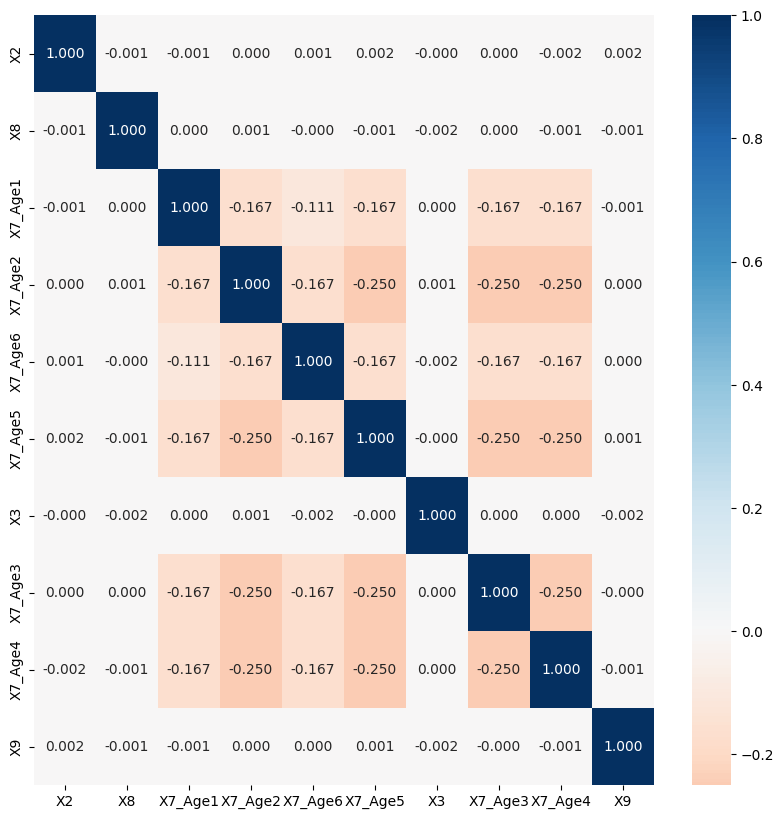

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_var = list(train_selected.columns)

corr = train_selected[corr_var].corr()

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr, annot=True, fmt=".3f", cmap="RdBu", center=0, ax=ax)

plt.show()

선택된 변수들 간 상관관계 크지 않음

# 모델 적합

In [110]:
import statsmodels.api as sm

X = train_minmax[['X2', 'X8', 'X7_Age1', 'X7_Age2', 'X7_Age6', 'X7_Age5', 'X3', 'X7_Age3', 'X7_Age4', 'X9']]
X = sm.add_constant(X)
y = train_minmax['log_Y'].to_list()
model = sm.OLS(y,X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 4.442e+06
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:22:08   Log-Likelihood:             2.7117e+06
No. Observations:             1000000   AIC:                        -5.423e+06
Df Residuals:                  999990   BIC:                        -5.423e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2169      0.000   1599.629      0.0

- 왜도값이 0.002로 0에 매우 가깝게 나온 것을 확인
- 더빈 왓슨 통계량의 경우 2에 근접한 값이 나왔기 때문에 오차항들 간 상관관계가 없는 것 확인
- 선택한 모든 변수들 유의함

In [111]:
testX_selected = testX_minmax[['X2', 'X8', 'X7_Age1', 'X7_Age2', 'X7_Age6', 'X7_Age5', 'X3', 'X7_Age3', 'X7_Age4', 'X9']]

In [112]:
testX_selected

,X2,X8,X7_Age1,X7_Age2,X7_Age6,X7_Age5,X3,X7_Age3,X7_Age4,X9
0,0.678899,0.510623,0.0,0.0,0.0,1.0,0.639401,0.0,0.0,0.479042
1,0.503435,0.542661,0.0,0.0,0.0,0.0,0.541503,1.0,0.0,0.520958
2,0.599198,0.447219,0.0,0.0,1.0,0.0,0.591623,0.0,0.0,0.497006
3,0.485841,0.574314,0.0,0.0,0.0,0.0,0.767779,0.0,1.0,0.514970
4,0.609599,0.188185,0.0,1.0,0.0,0.0,0.468952,0.0,0.0,0.449102
...,...,...,...,...,...,...,...,...,...,...
48595,0.397953,0.541375,0.0,0.0,0.0,0.0,0.699690,0.0,1.0,0.598802
48596,0.625434,0.494911,0.0,0.0,0.0,1.0,0.610154,0.0,0.0,0.538922
48597,0.627576,0.466395,0.0,0.0,0.0,0.0,0.427879,1.0,0.0,0.580838
48598,0.349372,0.520225,0.0,1.0,0.0,0.0,0.421150,0.0,0.0,0.221557


In [115]:
from sklearn.metrics import mean_squared_error, explained_variance_score

y_pred = model.predict(sm.add_constant(testX_selected))
y_test = testY_minmax[['log_Y']]
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.02870243813811168
